#Game of Life

In [13]:
!pip install celluloid


In [67]:
from graphviz import Digraph

In [14]:
import numpy as np
from celluloid import Camera
import matplotlib.pyplot as plt

Conway's life-step is implemented below:

In [29]:
def evolve(lattice):
    """Conway's Game of life one-time evolution"""

    x = np.shape(lattice)[0]
    y = np.shape(lattice)[1]
    latticefinal = np.copy(lattice) #without this line we have a maze generator!!!!!
    for i in range(0,x):
        for j in range(0,y):
            sum = 0
            for k in [-1,0,1]:
                for l in [-1,0,1]:
                    if not (k ==0 and l ==0):     
                        sum = sum + lattice[(i+k)%x][(j+l)%y]            
            if lattice[i][j] == 0:
                if sum == 3: 
                    latticefinal[i][j] = 1 #reproduction 
            elif lattice[i][j] == 1:
                if sum > 3: 
                    latticefinal[i][j] = 0 #overpopulation
                elif sum in [2,3]: 
                    latticefinal[i][j] = 1 #stasis
                elif sum in [0,1]: 
                    latticefinal[i][j] = 0 #underpopulation
    return latticefinal

In [34]:
def evolvemap(lattice):
    """Conway's Game of life tracing the transition states 
    generated by the present configuration

    notice: 

    1 - stasis
    2 - overpopulation
    3 - underpopulation
    4 - reproduction
    0 - nothingness
    
    """
    x = np.shape(lattice)[0]
    y = np.shape(lattice)[1]
    lattice2 = np.copy(lattice) 
    statemap = np.copy(lattice)
    for i in range(0,x):
        for j in range(0,y):
            sum = 0
            for k in [-1,0,1]:
                for l in [-1,0,1]:
                    if not (k ==0 and l ==0):     
                        sum = sum + lattice[(i+k)%x][(j+l)%y]            
            if lattice[i][j] == 0:
                if sum == 3: 
                    lattice2[i][j] = 1 #reproduction 
                    statemap[i][j] = 4
            elif lattice[i][j] == 1:
                if sum > 3: 
                    lattice2[i][j] = 0 #overpopulation
                    statemap[i][j] = 2
                elif sum in [2,3]: 
                    lattice2[i][j] = 1 #stasis
                    statemap[i][j] = 1
                elif sum in [0,1]: 
                    lattice2[i][j] = 0 #underpopulation
                    statemap[i][j] = 3
    return lattice2, statemap

In [38]:
def generate_lattice(n,p):
    lattice = np.zeros([n,n], dtype='int')
    for i in range(0,n):
        for j in range(0,n):
            if np.random.uniform() < p:
                lattice[i,j]=1
    return lattice

def generate_lattice_s(n,m,p):
    lattice = np.zeros([n,m], dtype='int')
    for i in range(0,n):
        for j in range(0,m):
            if np.random.uniform() < p:
                lattice[i,j]=1
    return lattice

def generate_lattice_pq(n,p,q):
    lattice = np.zeros([n,n], dtype='int')
    for i in range(0,n):
        for j in range(0,n):
            if i > p and i < q and j > p and j < q:
                lattice[i,j]=1
    return lattice

def generate_lattice_pq_s(n,m,p,q):
    lattice = np.zeros([n,m], dtype='int')
    for i in range(0,n):
        for j in range(0,m):
            if i > p and i < q and j > p and j < q:
                lattice[i,j]=1
    return lattice

In [ ]:
X =  generate_lattice_pq(31,11,15)

In [39]:
X =  generate_lattice_pq_s(25,20,7,15) #kaggle shape
X0 =  generate_lattice_s(25,20,0.5) #kaggle shape

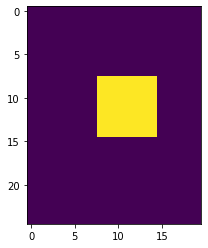

In [31]:
plt.imshow(X)

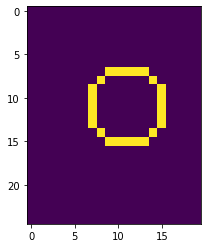

In [32]:
plt.imshow(evolve(X))

In [35]:
lattice2, statemap = evolvemap(X)

In [ ]:
lattice2, statemap = evolvemap(X)

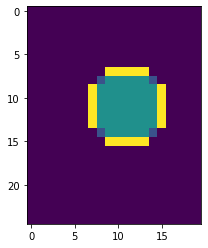

In [36]:
plt.imshow(statemap)

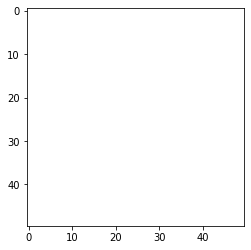

In [ ]:
Y =  generate_lattice(50,0.5)
fig = plt.figure()
camera = Camera(fig)
for i in range(1,100):
    plt.imshow( Y, cmap = 'magma')
    Y =  evolve(Y)
    camera.snap()
animation = camera.animate()
animation.save('gameoflife3.gif', writer = 'pillow')

In [ ]:
from google.colab import files
files.download( "gameoflife3.gif" )    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Viterbi Approach


Let's say the hidden states are the origins of a specific state in the lattice, i.e. the transitions that produce an observable present, namely state the four conway rules :

* Stasis = $S$
* Overpopulation = $O$
* Underpopulation = $U$
* Reproduction = $R$

Notice the transitions associated with each hidden state, and the fifth transition $Z$:

* $S :\, 1 \rightarrow 1$
* $O :\, 1 \rightarrow 0$
* $U :\, 1 \rightarrow 0$ 
* $R :\, 0 \rightarrow 1$
* $Z :\, 0 \rightarrow 0$


Let's define the sets  of $3 \, \times \, 3$ matrixes associated with each hidden state.



In [6]:
matrices = []
for a1 in [0,1]:
  for a2 in [0,1]:
    for a3 in [0,1]:
      for a4 in [0,1]:
        for a5 in [0,1]:
          for a6 in [0,1]:
            for a7 in [0,1]:
              for a8 in [0,1]:
                for a9 in [0,1]:
                  matrices.append([[a1, a2, a3],[a4, a5, a6],[a7, a8, a9]])
      


In [22]:
matrices[230]

[[0, 1, 1], [1, 0, 0], [1, 1, 0]]

In [21]:
matrixs = {}

In [16]:
np.sum(matrices[230])

5

In [71]:
matrizS = []
matrizO = []
matrizU = []
matrizR = []
matrizZ = []

for i in matrices:
  if i[1][1] == 1:
    if (np.sum(i)-1) in [2,3]:
      matrizS.append(i)
    if (np.sum(i)-1) in [0,1]:
      matrizU.append(i)
    if (np.sum(i)-1) > 3:
      matrizO.append(i)
  if i[1][1] == 0:
    if np.sum(i) == 3:
      matrizR.append(i)
    else: matrizZ.append(i)

In [74]:
print(len(matrices))
print(len(matrizS))
print(len(matrizO))
print(len(matrizU))
print(len(matrizR))
print(len(matrizZ))

512
84
163
9
56
200


For implementing viterbi we must write the emission matrix and the transition matrix!

##Transition Matrix 

Transition matrix will measure the probability of transitions between hidden states!

 1 - stasis - $S$

 2 - overpopulation - $O$

 3 - underpopulation - $U$

 4 - reproduction - $R$

 0 - nothingness - $Z$

First we'll do using the abstract states, then the $3 \times 3$ matrix configurations associated with each state

In [79]:
#TM = {'S|S':0, 'O|S':0, 'U|S':0, 'R|O':0, 'Z|O':0, 'R|U':0, 'Z|U':0,
#      'U|R':0, 'O|R':0, 'S|R':0, 'R|Z':0, 'Z|Z':0 }
TM = {'S':{'S':0, 'O':0 , 'U':0}, 'O':{'R':0, 'Z':0},'U':{'R':0, 'Z':0},
      'R':{'S':0, 'O':0 , 'U':0}, 'Z':{'R':0,'Z':0}}
TMa = {}

##Emission Matrix

Emission matrix will carry the probabilities of observing the living (1) or dead state (0) given the 5 hidden states

In [81]:
EM = {'S': {0:0, 1:1}, 'O':{0:0, 1:1},'U':{0:0, 1:1},
      'R':{0:1, 1:0}, 'Z':{0:1, 1:0}}

In [40]:
Y = np.copy(X0)

In [58]:
Y, statemap0 = evolvemap(Y)
x = np.shape(Y)[0]
y = np.shape(Y)[1]
for i in range(0,1000):
  Y, statemap = evolvemap(Y)
  for j in range(x):
    for l in range(y):
      if statemap0[j][l]==1 and statemap[j][l]==1: TM['S']['S'] +=1
      if statemap0[j][l]==1 and statemap[j][l]==2: TM['S']['O'] +=1
      if statemap0[j][l]==1 and statemap[j][l]==3: TM['S']['U'] +=1
      if statemap0[j][l]==2 and statemap[j][l]==4: TM['O']['R'] +=1
      if statemap0[j][l]==2 and statemap[j][l]==0: TM['O']['Z'] +=1
      if statemap0[j][l]==3 and statemap[j][l]==4: TM['U']['R'] +=1
      if statemap0[j][l]==3 and statemap[j][l]==0: TM['U']['Z'] +=1
      if statemap0[j][l]==4 and statemap[j][l]==1: TM['R']['S'] +=1
      if statemap0[j][l]==4 and statemap[j][l]==2: TM['R']['O'] +=1
      if statemap0[j][l]==4 and statemap[j][l]==3: TM['S']['S'] +=1
      if statemap0[j][l]==0 and statemap[j][l]==4: TM['Z']['R'] +=1
      if statemap0[j][l]==0 and statemap[j][l]==0: TM['Z']['Z'] +=1
  statemap0 = np.copy(statemap)
  


In [59]:
TM

{'O|R': 4112,
 'O|S': 6644,
 'R|O': 2800,
 'R|U': 2052,
 'R|Z': 12028,
 'S|R': 9335,
 'S|S': 18422,
 'U|R': 3473,
 'U|S': 2737,
 'Z|O': 7974,
 'Z|U': 4175,
 'Z|Z': 426248}

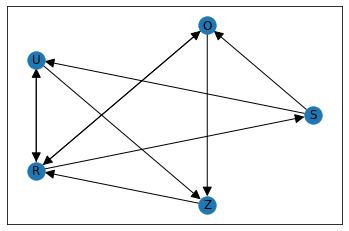

In [60]:
import networkx as nx

G = nx.DiGraph()
G.add_node('S')
G.add_node('O')
G.add_node('U')
G.add_node('R')
G.add_node('Z')
G.add_edge('S','S')
G.add_edge('S','O')
G.add_edge('S','U')
G.add_edge('O','R')
G.add_edge('O','Z')
G.add_edge('U','R')
G.add_edge('U','Z')
G.add_edge('R','S')
G.add_edge('R','O')
G.add_edge('R','U')
G.add_edge('Z','R')
G.add_edge('Z','Z')
#G.add_edges_from()
nx.draw_networkx(G, pos=nx.circular_layout(G) ,arrowsize=20)

In [63]:
from networkx.drawing.nx_agraph import write_dot

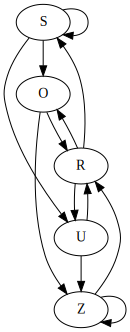

In [70]:
import networkx as nx
import matplotlib.pyplot as plt

G = Digraph('G')
G.edge('S','S')
G.edge('S','O')
G.edge('S','U')
G.edge('O','R')
G.edge('O','Z')
G.edge('U','R')
G.edge('U','Z')
G.edge('R','S')
G.edge('R','O')
G.edge('R','U')
G.edge('Z','R')
G.edge('Z','Z')
G

In [1]:
obs = ("normal", "cold", "dizzy")
states = ("Healthy", "Fever")
start_p = {"Healthy": 0.6, "Fever": 0.4}
trans_p = {
    "Healthy": {"Healthy": 0.7, "Fever": 0.3},
    "Fever": {"Healthy": 0.4, "Fever": 0.6},
}
emit_p = {
    "Healthy": {"normal": 0.5, "cold": 0.4, "dizzy": 0.1},
    "Fever": {"normal": 0.1, "cold": 0.3, "dizzy": 0.6},
}

In [ ]:
center = {}
neighbours = {}


center['S'] = 1
neighbours['S'] = [[1,1,0,0,0,0,0,0],
                  [1,1,1,0,0,0,0,0]]

center['O'] = 1
neighbours['O'] = [[1,1,1,1,0,0,0,0]
              ,[1,1,1,1,1,0,0,0]
              ,[1,1,1,1,1,1,0,0]
              ,[1,1,1,1,1,1,1,0]
              ,[1,1,1,1,1,1,1,1]]

center['U'] = 1
neighbours['U'] = [[0,0,0,0,0,0,0,0]
              ,[1,0,0,0,0,0,0,0]]

center['R'] = 0
neighbours['R'] = [[1,1,1,0,0,0,0,0]]

